In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Crear un DataFrame de ejemplo con datos
data = {
 'ID_Cliente': [
 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
 1, 3, 5, 6, 8, 9, 10, 2, 4, 6,
 2, 4, 7, 1, 5, 9, 3, 6, 7, 8
 ],
 'Fecha_Compra': [
 '2019-01', '2019-03', '2019-05', '2019-01', '2019-03',
 '2019-02', '2019-04', '2019-06', '2019-02', '2019-04',
 '2019-03', '2019-05', '2019-01', '2019-03', '2019-05',
 '2019-04', '2019-06', '2019-02', '2019-04', '2019-06',
 '2019-05', '2019-01', '2019-03', '2019-05', '2019-01',
 '2019-06', '2019-02', '2019-04', '2019-06', '2019-02',
 '2020-01', '2020-03', '2020-05', '2020-01', '2020-03',
 '2020-02', '2020-04', '2020-06', '2020-02', '2020-04'
 ],
 'Monto_Compra': [
 100, 150, 200, 80, 120, 160, 90, 100, 110, 200,
 250, 300, 90, 400, 450, 500, 600, 650, 700, 750,
 200, 180, 190, 260, 310, 120, 210, 300, 350, 400,
 80, 90, 250, 230, 340, 220, 290, 370, 330, 290
 ], 'Canal_Venta': [
 'Online', 'Online', 'Tienda', 'Tienda', 'Online',
 'Tienda', 'Online', 'Online', 'Tienda', 'Tienda',
 'Online', 'Online', 'Tienda', 'Tienda', 'Online',
 'Tienda', 'Tienda', 'Online', 'Online', 'Tienda',
 'Online', 'Tienda', 'Tienda', 'Online', 'Online',
 'Tienda', 'Tienda', 'Online', 'Online', 'Tienda',
 'Online', 'Tienda', 'Tienda', 'Online', 'Online',
 'Tienda', 'Tienda', 'Online', 'Online', 'Tienda'
 ]
}
# Crear DataFrame

In [2]:
df = pd.DataFrame(data)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID_Cliente    40 non-null     int64 
 1   Fecha_Compra  40 non-null     object
 2   Monto_Compra  40 non-null     int64 
 3   Canal_Venta   40 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


In [3]:
df['Fecha_Compra'] = pd.to_datetime(df['Fecha_Compra']).dt.to_period('M')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   ID_Cliente    40 non-null     int64    
 1   Fecha_Compra  40 non-null     period[M]
 2   Monto_Compra  40 non-null     int64    
 3   Canal_Venta   40 non-null     object   
dtypes: int64(2), object(1), period[M](1)
memory usage: 1.4+ KB


In [4]:
# Calcular el mes de la primera compra de cada cliente y asignarlo como la Cohorte
df['Cohorte'] = df.groupby('ID_Cliente')['Fecha_Compra'].transform('min')
df.head()


,ID_Cliente,Fecha_Compra,Monto_Compra,Canal_Venta,Cohorte
0,1,2019-01,100,Online,2019-01
1,2,2019-03,150,Online,2019-03
2,3,2019-05,200,Tienda,2019-01
3,4,2019-01,80,Tienda,2019-01
4,5,2019-03,120,Online,2019-03


In [5]:
# Calcular la cantidad de clientes de cada cohorte en cada mes
cohort_sizes_monthly = df.groupby(['Cohorte','Fecha_Compra']).agg(Num_Clientes=('ID_Cliente','nunique')).reset_index()
cohort_sizes_monthly

,Cohorte,Fecha_Compra,Num_Clientes
0,2019-01,2019-01,4
1,2019-01,2019-02,1
2,2019-01,2019-03,2
3,2019-01,2019-05,2
4,2019-01,2019-06,2
5,2019-01,2020-01,1
6,2019-01,2020-03,1
7,2019-01,2020-04,2
8,2019-02,2019-02,3
9,2019-02,2019-04,3


In [6]:
# Calcular la cantidad de clientes en la primera compra de cada cohorte
cohort_sizes_initial = cohort_sizes_monthly.groupby('Cohorte').first()
cohort_sizes_initial


,Fecha_Compra,Num_Clientes
Cohorte,,
2019-01,2019-01,4
2019-02,2019-02,3
2019-03,2019-03,2
2019-04,2019-04,1


In [7]:
# Calcular la tasa de retención
retention = cohort_sizes_monthly.pivot(index='Cohorte',columns='Fecha_Compra',values='Num_Clientes').divide(cohort_sizes_initial['Num_Clientes'],axis=0)
retention

Fecha_Compra,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06
Cohorte,,,,,,,,,,,,
2019-01,1.0,0.25,0.5,NaN,0.500000,0.500000,0.25,NaN,0.25,0.5,NaN,NaN
2019-02,NaN,1.00,NaN,1.0,0.333333,0.666667,NaN,0.333333,NaN,NaN,NaN,0.333333
2019-03,NaN,NaN,1.0,0.5,1.000000,NaN,0.50,NaN,0.50,NaN,NaN,NaN
2019-04,NaN,NaN,NaN,1.0,NaN,1.000000,NaN,1.000000,NaN,NaN,1.0,NaN


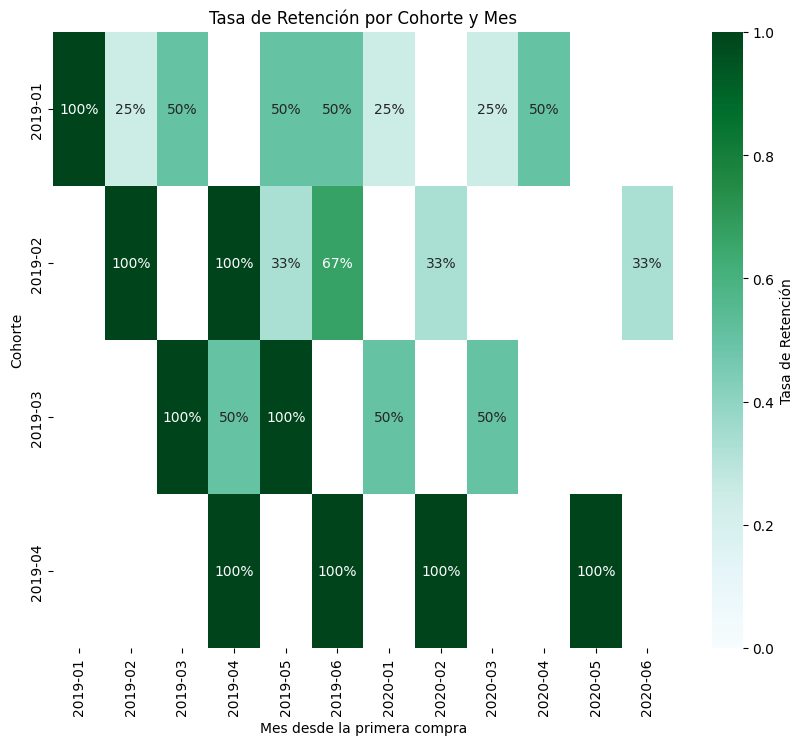

In [8]:
# Graficar la tasa de retención
plt.figure(figsize=(10, 8))
plt.title('Tasa de Retención por Cohorte y Mes')
sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=1.0,
cmap='BuGn', cbar_kws={'label': 'Tasa de Retención'})
plt.xlabel('Mes desde la primera compra')
plt.xticks(rotation=90)
plt.ylabel('Cohorte')
plt.show()

In [9]:
abandon = 1 - retention
abandon


Fecha_Compra,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06
Cohorte,,,,,,,,,,,,
2019-01,0.0,0.75,0.5,NaN,0.500000,0.500000,0.75,NaN,0.75,0.5,NaN,NaN
2019-02,NaN,0.00,NaN,0.0,0.666667,0.333333,NaN,0.666667,NaN,NaN,NaN,0.666667
2019-03,NaN,NaN,0.0,0.5,0.000000,NaN,0.50,NaN,0.50,NaN,NaN,NaN
2019-04,NaN,NaN,NaN,0.0,NaN,0.000000,NaN,0.000000,NaN,NaN,0.0,NaN


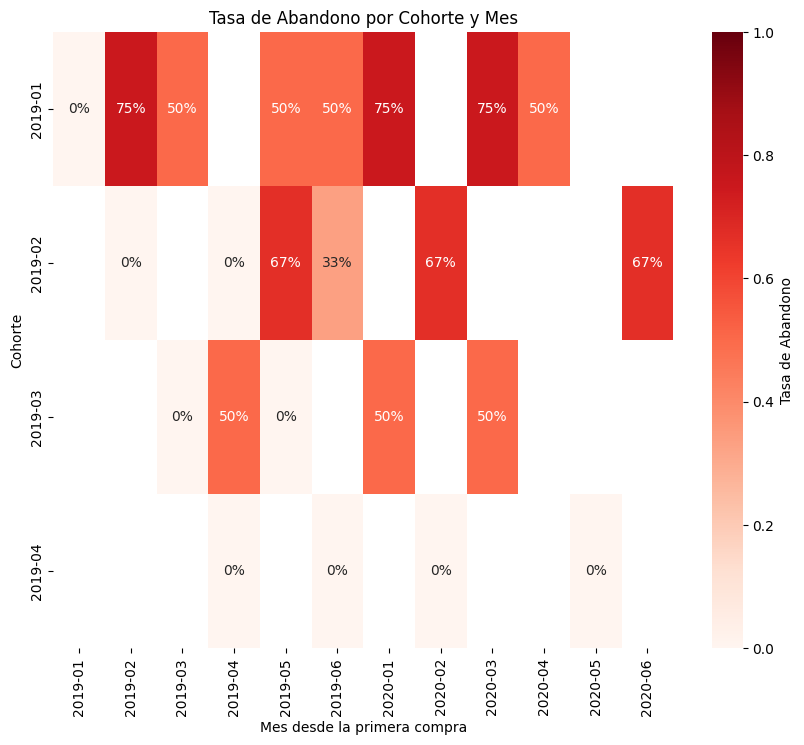

In [10]:
# Graficar la tasa de abandono
plt.figure(figsize=(10, 8))
plt.title('Tasa de Abandono por Cohorte y Mes')
sns.heatmap(data=abandon, annot=True, fmt='.0%', vmin=0.0, vmax=1.0,
cmap='Reds', cbar_kws={'label': 'Tasa de Abandono'})
plt.xlabel('Mes desde la primera compra')
plt.xticks(rotation=90)
plt.ylabel('Cohorte')
plt.show()

FECHA DE COMPRA


In [11]:
# Calcular la frecuencia de compras por cohorte y mes
frecuencia_media = df.groupby(['Cohorte','Fecha_Compra']).agg(Total_Compras=('ID_Cliente','count')).reset_index()
frecuencia_media =frecuencia_media.merge(cohort_sizes_monthly.groupby('Cohorte')['Num_Clientes'].first().reset_index(), on='Cohorte')
frecuencia_media


,Cohorte,Fecha_Compra,Total_Compras,Num_Clientes
0,2019-01,2019-01,5,4
1,2019-01,2019-02,1,4
2,2019-01,2019-03,2,4
3,2019-01,2019-05,2,4
4,2019-01,2019-06,2,4
5,2019-01,2020-01,1,4
6,2019-01,2020-03,1,4
7,2019-01,2020-04,2,4
8,2019-02,2019-02,4,3
9,2019-02,2019-04,3,3


In [12]:
frecuencia_media['Frecuencia_Media'] =frecuencia_media['Total_Compras'] / frecuencia_media['Num_Clientes']
frecuencia_media


,Cohorte,Fecha_Compra,Total_Compras,Num_Clientes,Frecuencia_Media
0,2019-01,2019-01,5,4,1.250000
1,2019-01,2019-02,1,4,0.250000
2,2019-01,2019-03,2,4,0.500000
3,2019-01,2019-05,2,4,0.500000
4,2019-01,2019-06,2,4,0.500000
5,2019-01,2020-01,1,4,0.250000
6,2019-01,2020-03,1,4,0.250000
7,2019-01,2020-04,2,4,0.500000
8,2019-02,2019-02,4,3,1.333333
9,2019-02,2019-04,3,3,1.000000


In [13]:
# Crear una tabla pivotante para la frecuencia media de compra
frecuencia_heatmap = frecuencia_media.pivot_table(index='Cohorte',columns='Fecha_Compra', values='Frecuencia_Media')
frecuencia_heatmap


Fecha_Compra,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06
Cohorte,,,,,,,,,,,,
2019-01,1.25,0.250000,0.5,NaN,0.500000,0.500000,0.25,NaN,0.25,0.5,NaN,NaN
2019-02,NaN,1.333333,NaN,1.0,0.333333,0.666667,NaN,0.333333,NaN,NaN,NaN,0.333333
2019-03,NaN,NaN,1.5,0.5,1.000000,NaN,0.50,NaN,0.50,NaN,NaN,NaN
2019-04,NaN,NaN,NaN,1.0,NaN,1.000000,NaN,1.000000,NaN,NaN,1.0,NaN


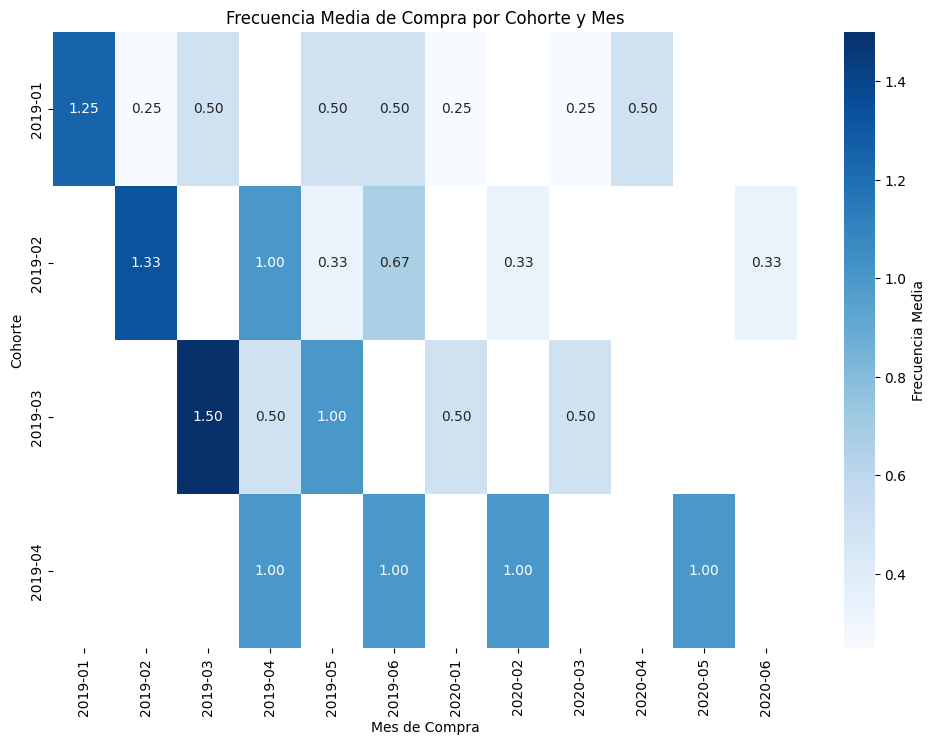

In [14]:
# Graficar frecuencia media de compra como heatmap
plt.figure(figsize=(12, 8))
plt.title('Frecuencia Media de Compra por Cohorte y Mes')
sns.heatmap(data=frecuencia_heatmap, annot=True, fmt='.2f',
cmap='Blues', cbar_kws={'label': 'Frecuencia Media'})
plt.xlabel('Mes de Compra')
plt.xticks(rotation=90)
plt.ylabel('Cohorte')
plt.show()


VALOR MEDIO DE COMPRA


In [15]:
# Calcular el valor medio de compra por cohorte y mes
valor_medio_compra = df.groupby(['Cohorte', 'Fecha_Compra'])['Monto_Compra'].mean().reset_index()
valor_medio_compra

,Cohorte,Fecha_Compra,Monto_Compra
0,2019-01,2019-01,152.000000
1,2019-01,2019-02,650.000000
2,2019-01,2019-03,325.000000
3,2019-01,2019-05,200.000000
4,2019-01,2019-06,225.000000
5,2019-01,2020-01,230.000000
6,2019-01,2020-03,90.000000
7,2019-01,2020-04,290.000000
8,2019-02,2019-02,220.000000
9,2019-02,2019-04,466.666667


In [16]:
# Crear una tabla pivotante para el valor medio de compra
valor_medio_heatmap = valor_medio_compra.pivot_table(index='Cohorte',columns='Fecha_Compra', values='Monto_Compra')
valor_medio_heatmap


Fecha_Compra,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06
Cohorte,,,,,,,,,,,,
2019-01,152.0,650.0,325.000000,NaN,200.0,225.0,230.0,NaN,90.0,290.0,NaN,NaN
2019-02,NaN,220.0,NaN,466.666667,260.0,435.0,NaN,220.0,NaN,NaN,NaN,370.0
2019-03,NaN,NaN,153.333333,300.000000,375.0,NaN,80.0,NaN,340.0,NaN,NaN,NaN
2019-04,NaN,NaN,NaN,90.000000,NaN,600.0,NaN,330.0,NaN,NaN,250.0,NaN


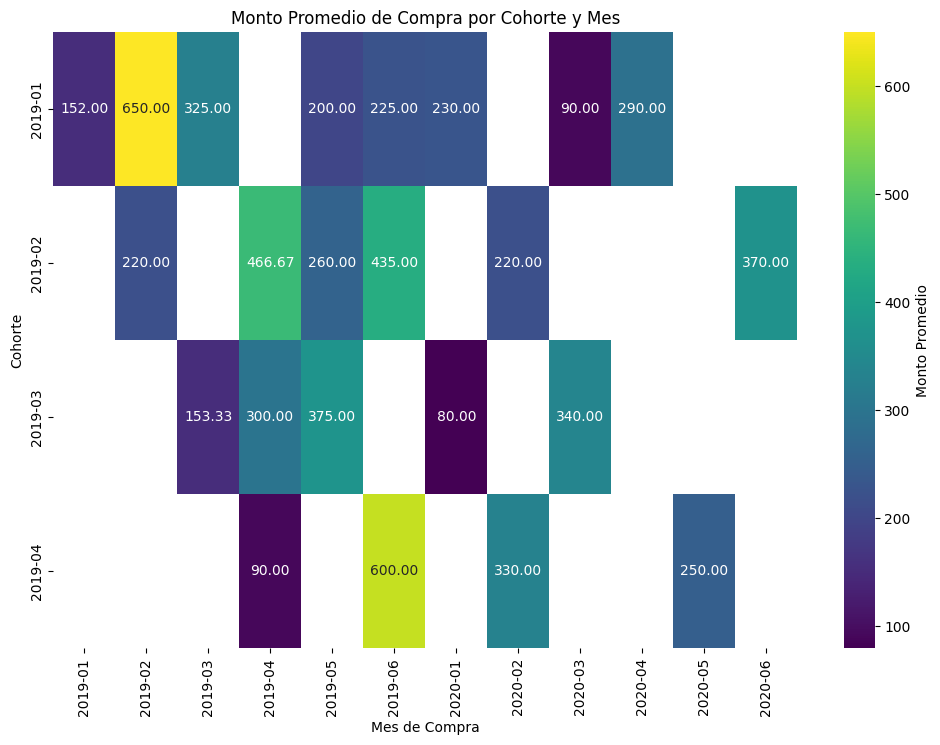

In [17]:
# Graficar valor medio de compra como heatmap
plt.figure(figsize=(12, 8))
plt.title('Monto Promedio de Compra por Cohorte y Mes')
sns.heatmap(data=valor_medio_heatmap, annot=True, fmt='.2f',
cmap='viridis', cbar_kws={'label': 'Monto Promedio'})
plt.xlabel('Mes de Compra')
plt.xticks(rotation=90)
plt.ylabel('Cohorte')
plt.show()

ANALISIS POR INGRESOS ACUMULADOS


In [18]:
# Calcular ingresos acumulados por cohorte y mes
ingresos_acumulados = df.groupby(['Cohorte','Fecha_Compra']).agg(Ingresos=('Monto_Compra', 'sum')).reset_index()
ingresos_acumulados

,Cohorte,Fecha_Compra,Ingresos
0,2019-01,2019-01,760
1,2019-01,2019-02,650
2,2019-01,2019-03,650
3,2019-01,2019-05,400
4,2019-01,2019-06,450
5,2019-01,2020-01,230
6,2019-01,2020-03,90
7,2019-01,2020-04,580
8,2019-02,2019-02,880
9,2019-02,2019-04,1400


In [19]:
# Calcular los ingresos acumulados
ingresos_acumulados['Ingresos_Acumulados'] =ingresos_acumulados.groupby('Cohorte')['Ingresos'].cumsum()
ingresos_acumulados


,Cohorte,Fecha_Compra,Ingresos,Ingresos_Acumulados
0,2019-01,2019-01,760,760
1,2019-01,2019-02,650,1410
2,2019-01,2019-03,650,2060
3,2019-01,2019-05,400,2460
4,2019-01,2019-06,450,2910
5,2019-01,2020-01,230,3140
6,2019-01,2020-03,90,3230
7,2019-01,2020-04,580,3810
8,2019-02,2019-02,880,880
9,2019-02,2019-04,1400,2280


In [20]:
# Crear una tabla pivotante para los ingresos acumulados
ingresos_heatmap = ingresos_acumulados.pivot_table(index='Cohorte',columns='Fecha_Compra', values='Ingresos_Acumulados')
ingresos_heatmap


Fecha_Compra,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06
Cohorte,,,,,,,,,,,,
2019-01,760.0,1410.0,2060.0,NaN,2460.0,2910.0,3140.0,NaN,3230.0,3810.0,NaN,NaN
2019-02,NaN,880.0,NaN,2280.0,2540.0,3410.0,NaN,3630.0,NaN,NaN,NaN,4000.0
2019-03,NaN,NaN,460.0,760.0,1510.0,NaN,1590.0,NaN,1930.0,NaN,NaN,NaN
2019-04,NaN,NaN,NaN,90.0,NaN,690.0,NaN,1020.0,NaN,NaN,1270.0,NaN


In [21]:
ingresos_acumulados2 = ingresos_acumulados.groupby('Cohorte')['Ingresos'].cumsum()
ingresos_acumulados

,Cohorte,Fecha_Compra,Ingresos,Ingresos_Acumulados
0,2019-01,2019-01,760,760
1,2019-01,2019-02,650,1410
2,2019-01,2019-03,650,2060
3,2019-01,2019-05,400,2460
4,2019-01,2019-06,450,2910
5,2019-01,2020-01,230,3140
6,2019-01,2020-03,90,3230
7,2019-01,2020-04,580,3810
8,2019-02,2019-02,880,880
9,2019-02,2019-04,1400,2280


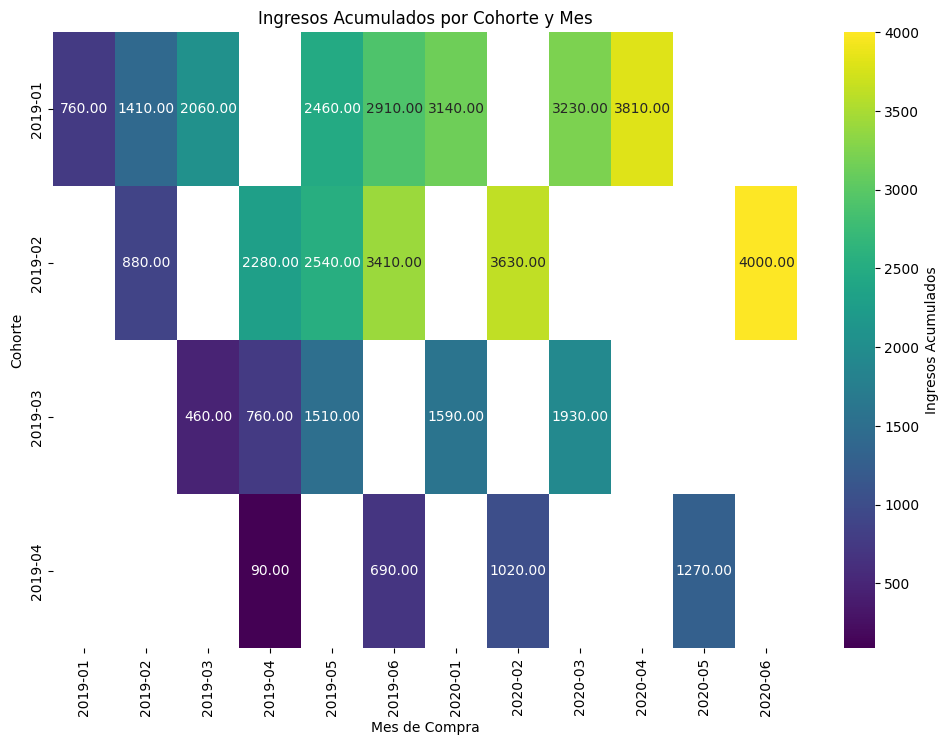

In [22]:
# Graficar ingresos acumulados como heatmap
plt.figure(figsize=(12, 8))
plt.title('Ingresos Acumulados por Cohorte y Mes')
sns.heatmap(data=ingresos_heatmap, annot=True, fmt='.2f',
cmap='viridis', cbar_kws={'label': 'Ingresos Acumulados'})
plt.xlabel('Mes de Compra')
plt.xticks(rotation=90)
plt.ylabel('Cohorte')
plt.show()

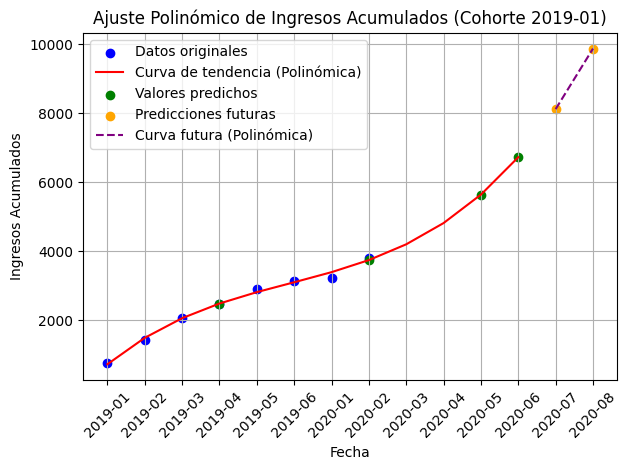

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Seleccionar los datos de la cohorte 2019-01
cohorte_2019_01 = ingresos_heatmap.loc['2019-01']

#Crear un Dataframe con los valores no nulos
datos_no_nulos = cohorte_2019_01.dropna()
x_no_nulos = np.array(range(len(datos_no_nulos))).reshape(-1, 1)
y_no_nulos = datos_no_nulos.values

#Trasnformar los datos para ajustar un modelo polinomico de grado 3
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x_no_nulos)

#crear el modelo de regression lineal sobre los datos transformados
modelo = LinearRegression()
modelo.fit(x_poly, y_no_nulos)

#Predecir los valores faltantes (Antes de 2020-04)
total_fechas = len(cohorte_2019_01.index)
fechas_completas = np.array(range(total_fechas)).reshape(-1, 1)
fechas_completas_poly = poly.transform(fechas_completas)
predicciones_completas = modelo.predict(fechas_completas_poly)

# Predecir los valores para fechas futuras (2020-05, 2020-06)
fechas_futuras = np.array([total_fechas, total_fechas + 1]).reshape(-1, 1)
fechas_futuras_poly = poly.transform(fechas_futuras)
predicciones_futuras = modelo.predict(fechas_futuras_poly)

#Graficar los datos originales (Sin los NULOS)
plt.scatter(x_no_nulos, y_no_nulos, label='Datos originales', color='blue')

#Graficar la curva de tendencia (ajuste polinomico)
plt.plot(fechas_completas, predicciones_completas, color='red', label='Curva de tendencia (Polinómica)')

#Graficar los valores predichos (Faltantes)
faltantes_indices = np.where(cohorte_2019_01.isna())[0]
plt.scatter(faltantes_indices, predicciones_completas[faltantes_indices], color='green', label='Valores predichos')

#Graficar las predicciones futuras
fechas_futuras_etiquetas = ['2020-07', '2020-08']
plt.scatter(fechas_futuras, predicciones_futuras, color='orange', label='Predicciones futuras')
plt.plot(fechas_futuras, predicciones_futuras, color='purple', linestyle='--', label='Curva futura (Polinómica)')

#Configurar las etiquetas del eje X con las fechas
fechas_reales = list(cohorte_2019_01.index) + fechas_futuras_etiquetas
plt.xticks(ticks=range(len(fechas_reales)), labels=fechas_reales, rotation=45)

#Conf Grafico
plt.xlabel('Fecha')
plt.ylabel('Ingresos Acumulados')
plt.title('Ajuste Polinómico de Ingresos Acumulados (Cohorte 2019-01)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

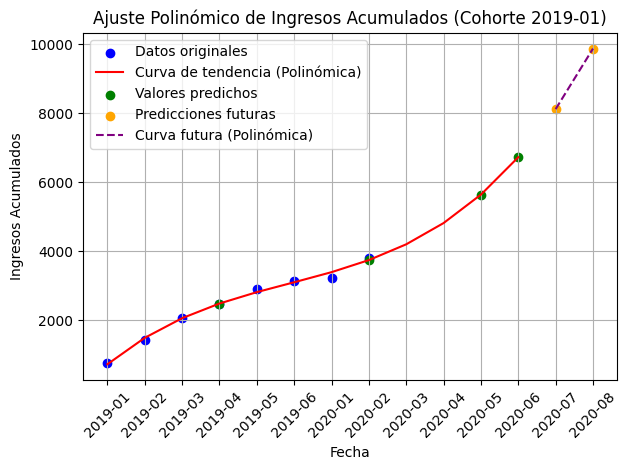

In [29]:




# Fechas completas, incluyendo tanto las fechas originales como las faltantes y las futuras
fechas_completas = np.array(range(total_fechas)).reshape(-1, 1)

# Transformar todas las fechas (incluyendo las faltantes)
fechas_completas_poly = poly.transform(fechas_completas)

# Realizar las predicciones completas
predicciones_completas = modelo.predict(fechas_completas_poly)

# Incluir fechas de predicción futuras como 2020-05, 2020-06, etc.
fechas_futuras = np.array([total_fechas, total_fechas + 1]).reshape(-1, 1)
fechas_futuras_poly = poly.transform(fechas_futuras)
predicciones_futuras = modelo.predict(fechas_futuras_poly)

# Graficar los datos originales
plt.scatter(x_no_nulos, y_no_nulos, label='Datos originales', color='blue')

# Graficar la curva de tendencia (ajuste polinómico)
plt.plot(fechas_completas, predicciones_completas, color='red', label='Curva de tendencia (Polinómica)')

# Graficar los valores predichos para las fechas faltantes
faltantes_indices = np.where(cohorte_2019_01.isna())[0]
plt.scatter(faltantes_indices, predicciones_completas[faltantes_indices], color='green', label='Valores predichos')

# Graficar las predicciones futuras
fechas_futuras_etiquetas = ['2020-07', '2020-08']
plt.scatter(fechas_futuras, predicciones_futuras, color='orange', label='Predicciones futuras')
plt.plot(fechas_futuras, predicciones_futuras, color='purple', linestyle='--', label='Curva futura (Polinómica)')

# Configurar etiquetas de fechas en el eje X
fechas_reales = list(cohorte_2019_01.index) + fechas_futuras_etiquetas
plt.xticks(ticks=range(len(fechas_reales)), labels=fechas_reales, rotation=45)

# Configuración del gráfico
plt.xlabel('Fecha')
plt.ylabel('Ingresos Acumulados')
plt.title('Ajuste Polinómico de Ingresos Acumulados (Cohorte 2019-01)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# graficar_ingressos_polinomicos(ingressos_heatmap, cohorte='2019-01', fechas_futuras = ['2020-07', '2020-09', grado = 3])